# Exposure model: Shortest path between origin and destination

This IPython notebook processes a shapefile, and creates an exposure model.

Each asset has a typology associated, that will be defined based on an external .csv file or on the length of the asset.

In [1]:
from time import gmtime, strftime
%matplotlib inline
import utilsNetwork

Specify the location of the vector GIS file containing the network:

In [2]:
networkShp = '/home/openquake/GEM/Lifelines/Building_NetworkNew/Input_files/ShortestPathSpain/mo_FINAL.shp'
networkShp = '/home/openquake/GEM/Lifelines/Building_NetworkNew/Input_files/railwayPathSines/railway.shp'
#networkShp = '/media/sf_Shared_Folder/Paper_Scenarios/testFilesExposure/highways-part.shp'

(shpAdj,maxNumConn) = utilsNetwork.shp_adj(networkShp)

Specify the location of the folder where the results will be saved

In [3]:
resultsFolder = '/media/sf_Shared_Folder/Paper_Scenarios/2016-09-Revision/' 

Specify maxDist, the maximum distance between 2 points in the network (in km). If an edge is bigger than maxDist, it will be divided in two, creating a new point.
Note: only verifies if 1st or 2nd relation node distances are > maxDist

In [4]:
maxDist = 20
maxDistBr = 20

In [5]:
shpAdjMaxDist = utilsNetwork.divide_edges(shpAdj,maxNumConn,maxDist)

Choose between option A or B:

A: Provide a vector GIS file containing the location of the bridges (bridges_shp)

OR

B: Provide a .csv file containing the assets coordinates (one node per asset) (brNodes).
In this option, if you have the exact coordinates of the assets in the network, use find_br_rows_exact_coord (faster).
Else, if you want to search the closest node to the given coordinates, use find_br_rows_closest_coord

In [6]:
#Option A
bridgesShp = '/media/sf_Shared_Folder/Paper_Scenarios/testFilesExposure/highways-partBr.shp'
bridgesShp = '/home/openquake/GEM/Lifelines/Building_NetworkNew/Input_files/ShortestPathSpain/mo_br.shp'

#brAdj = utilsNetwork.shp_adj_br(bridgesShp,maxDistBr,resultsFolder)
#brRows = utilsNetwork.one_node_per_bridge(brAdj,shpAdjMaxDist,resultsFolder)

##### OR #####

#Option B
brNodes = '../Input_files/railwayPathSines/bridges.csv'
brRows = utilsNetwork.find_br_rows_closest_coord(shpAdjMaxDist, brNodes)
#brRows = utilsNetwork.find_br_rows_exact_coord(shpAdjMaxDist,brNodes)

Option A: If assets (viaducts) that cross the network are to be considered, provide a .csv file with the coordinates of these assets (brPerpNodes)

Option B: If these assets are not considered

In [7]:
#Option A
#brPerpNodes = '/media/sf_Shared_Folder/testFilesExposure/br_links_nodes_mo.csv'
brPerpNodes = '/home/openquake/GEM/Lifelines/Building_NetworkNew/Input_files/ShortestPathSpain/br_nodes+links_nodes_mo.csv'
brPerpNodes = '/home/openquake/GEM/Lifelines/Building_NetworkNew/Input_files/railwayPathSines/viaducts.csv'

#brPerpRows = utilsNetwork.find_br_rows_exact_coord(shpAdjMaxDist,brPerpNodes)
brPerpRows = utilsNetwork.find_br_rows_closest_coord(shpAdjMaxDist,brPerpNodes)

#Option B
#brPerpRows = 0

In this case we assume four typologies of assets: three typologies of bridges and one of viaducts 

FF1: Single span bridges (length < 40m)

FF2: Multi-span medium length (40m < length < 150m)

FF3: Multi-span major bridges (length > 150m)

FF4: Viaducts

In [8]:
limit_length1 = 40.
limit_length2 = 150.
adj = utilsNetwork.sim_adj(shpAdjMaxDist,brRows,brPerpRows,maxDist,limit_length1,limit_length2)

In [9]:
(nodes, edges, weights) = utilsNetwork.save_files_networkx(adj,maxNumConn,resultsFolder)

### Shortest path

Specify the coordinates of the source and destination, to calculate the shortest path between these locations.

In [14]:
#Source coordinates - Lisbon
#lon1 = -9.142685
#lat1 = 38.736946
#Source coordinates - Spain
#lon1 = -7.035
#lat1 = 38.883
#Source coordinates - Sines Port
lon1 = -8.836
lat1 = 37.939
#Destination coordinates - Factory
lon2 = -7.979
lat2 = 37.575

(source, destination) = utilsNetwork.node_in_out(adj,lon1,lat1,lon2,lat2)

Choose between a directed or undirected graph (if the direction of the edges is taken into account or not)

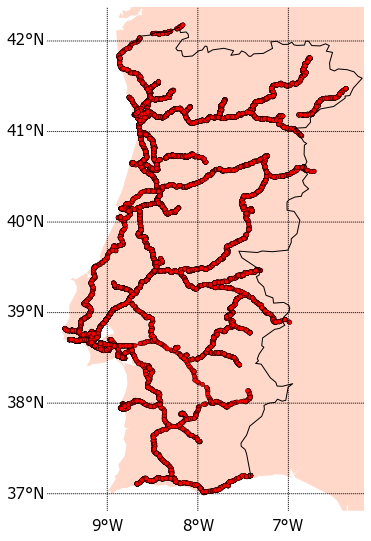

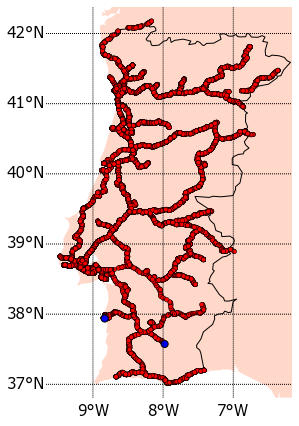

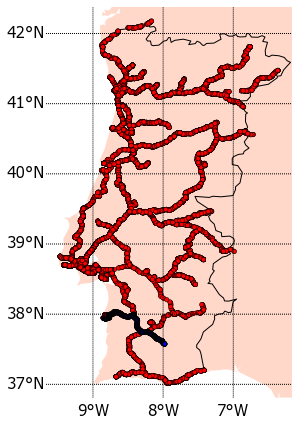

In [15]:
import networkx as nx
#Directed graph:
#G = nx.DiGraph()
#Undirected graph:
G = nx.Graph()    
(plotN,G,pos,pngLimits) = utilsNetwork.draw_network(nodes, edges, weights, G)
utilsNetwork.draw_nodes(source,destination,G,pos,pngLimits)

saveImage = False
filename = './pathLx.png'
utilsNetwork.shortest_path(G,source,destination,pos,filename,saveImage,resultsFolder,pngLimits)

Option A: if the exposure model will only include point assets (the assets previously specified) 

OR 

Option B: if the exposure model will include point and linear assets

In [16]:
path1 = '/media/sf_Shared_Folder/Paper_Scenarios/2016-09-Revision/path1.txt'
nodes = '/media/sf_Shared_Folder/Paper_Scenarios/2016-09-Revision/network-nodes.txt'

path_number = 1
utilsNetwork.path_coord(path1,nodes,path_number)


#Option A: Select only the nodes that are bridges
path1FF = utilsNetwork.path_br_ff(path1,adj,path_number,resultsFolder)

##### OR #####

#Option B: Select all the nodes (bridges and pavement)
#path1FF = utilsNetwork.path_ff(path1,adj,path_number,resultsFolder)

To create the a .csv file with the coordinates of the assets, specify the file created in the previous step.

In [17]:
exposureTxt = '/media/sf_Shared_Folder/Paper_Scenarios/2016-09-Revision/path1-exposure.txt'

utilsNetwork.exposure_1path(exposureTxt,resultsFolder)